In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("drug200.csv.rtf")

In [3]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug\par
0,23,F,HIGH,HIGH,25.355,drugY\par
1,47,M,LOW,HIGH,13.093,drugC\par
2,47,M,LOW,HIGH,10.114,drugC\par
3,28,F,NORMAL,HIGH,7.798,drugX\par
4,61,F,LOW,HIGH,18.043,drugY\par


In [16]:
data['index']=pd.Series(range(0,200))
data=data.set_index('index')

In [17]:
data.rename(columns={'Drug\par':"y"}, inplace=True)
dict_y={'y':{'drugY\par':'drugy','drugX\par':'drugX' ,'drugA\par':'drugA','drugC\par':'drugC','drugB\par':'drugB'
           }}
data.replace(dict_y,inplace=True)


In [18]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,y
index,,,,,,
0,23,F,HIGH,HIGH,25.355,drugy
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugy


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   y            200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 10.9+ KB


In [20]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [21]:
data.shape

(200, 6)

In [22]:
data['y'].value_counts()

drugy    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: y, dtype: int64

In [23]:
data['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [24]:
data['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [25]:
data['Cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [26]:
numeric_columns = ['Age', 'Na_to_K']
categoric_columns = ['Sex', 'BP', 'Cholesterol']

In [27]:
data.groupby('y').mean()

,Age,Na_to_K
y,,
drugA,35.869565,10.918783
drugB,62.500000,11.524375
drugC,42.500000,10.633750
drugX,44.018519,10.650556
drugy,43.747253,22.374780


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

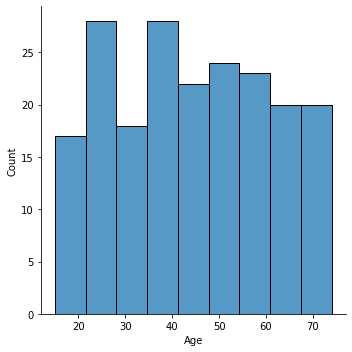

In [30]:
sns.displot(data['Age'])

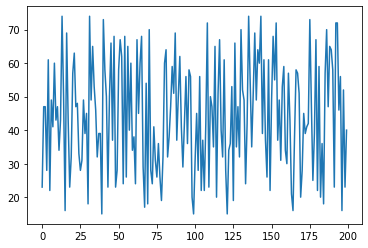

In [47]:
plt.plot(data.Age)

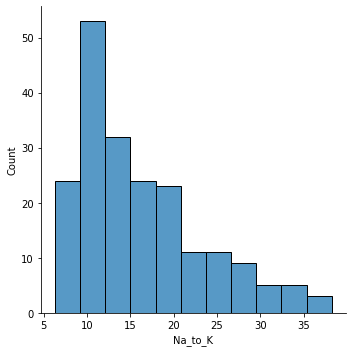

In [31]:
sns.displot(data['Na_to_K'])

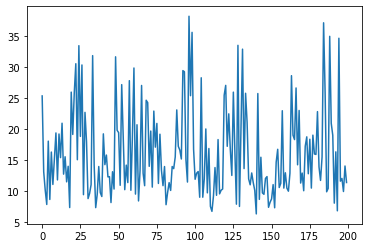

In [48]:
plt.plot(data.Na_to_K)

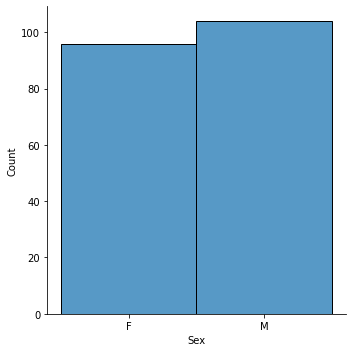

In [32]:
sns.displot(data['Sex'])

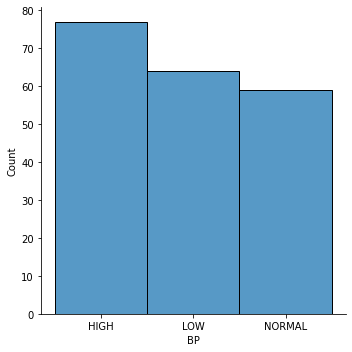

In [33]:
sns.displot(data['BP'])

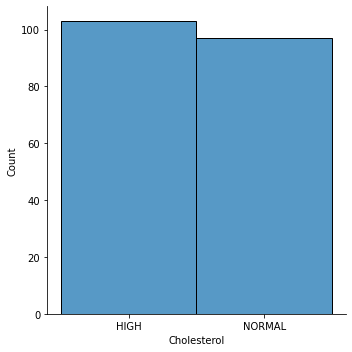

In [34]:
sns.displot(data['Cholesterol'])

<AxesSubplot:xlabel='Sex'>

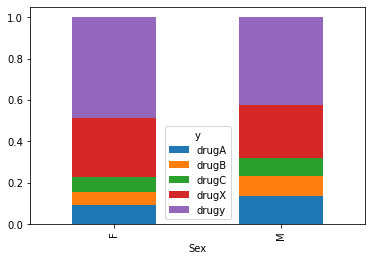

In [35]:
crosstab_1 = pd.crosstab(data["Sex"], data["y"])
crosstab_norm1 = crosstab_1.div(crosstab_1.sum(1), axis = 0)
crosstab_norm1.plot(kind="bar", stacked = True)

<AxesSubplot:xlabel='BP'>

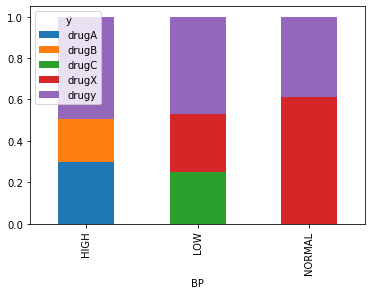

In [36]:
crosstab_1 = pd.crosstab(data["BP"], data["y"])
crosstab_norm1 = crosstab_1.div(crosstab_1.sum(1), axis = 0)
crosstab_norm1.plot(kind="bar", stacked = True)

<AxesSubplot:xlabel='Cholesterol'>

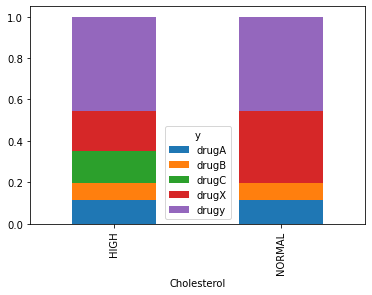

In [37]:
crosstab_1 = pd.crosstab(data["Cholesterol"], data["y"])
crosstab_norm1 = crosstab_1.div(crosstab_1.sum(1), axis = 0)
crosstab_norm1.plot(kind="bar", stacked = True)

In [39]:
b_age_drugA = data[data.y == "drugA"]['Age']
b_age_drugB = data[data.y == "drugB"]['Age']
b_age_drugC = data[data.y == "drugC"]['Age']
b_age_drugX = data[data.y == "drugX"]['Age']
b_age_drugY = data[data.y == "drugY"]['Age']

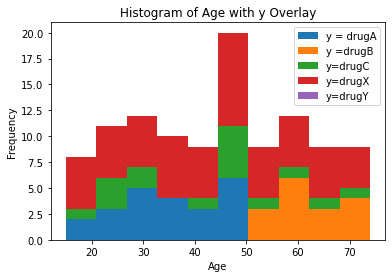

In [40]:
plt.hist([b_age_drugA, b_age_drugB,b_age_drugC,b_age_drugX,b_age_drugY], bins = 10, stacked = True)
plt.legend(["y = drugA", "y =drugB",'y=drugC','y=drugX','y=drugY'])
plt.title("Histogram of Age with y Overlay")
plt.xlabel("Age"); plt.ylabel("Frequency"); plt.show()

In [41]:
b_Na_drugA = data[data.y == "drugA"]['Na_to_K']
b_Na_drugB = data[data.y == "drugB"]['Na_to_K']
b_Na_drugC = data[data.y == "drugC"]['Na_to_K']
b_Na_drugX = data[data.y == "drugX"]['Na_to_K']
b_Na_drugY = data[data.y == "drugY"]['Na_to_K']

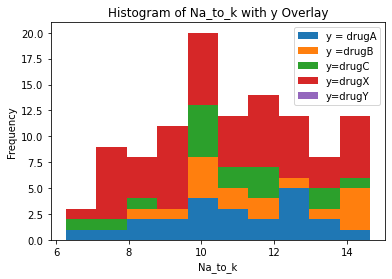

In [42]:
plt.hist([b_Na_drugA, b_Na_drugB,b_Na_drugC,b_Na_drugX,b_Na_drugY], bins = 10, stacked = True)
plt.legend(["y = drugA", "y =drugB",'y=drugC','y=drugX','y=drugY'])
plt.title("Histogram of Na_to_k with y Overlay")
plt.xlabel("Na_to_k"); plt.ylabel("Frequency"); plt.show()

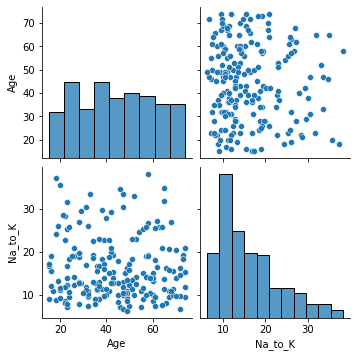

In [44]:
sns.pairplot(data[['Age','Na_to_K']])

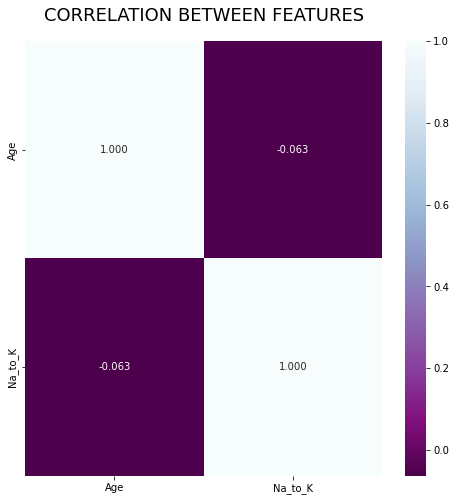

In [45]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), annot=True, fmt='.3f', cmap='BuPu_r')
plt.title("CORRELATION BETWEEN FEATURES", fontsize=18, color='black', pad = 20)
plt.show()

In [51]:
data.duplicated().sum()

0

<AxesSubplot:>

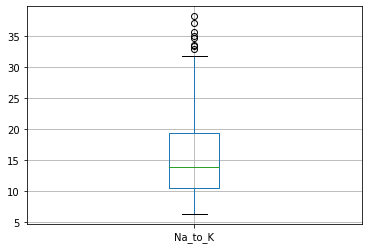

In [53]:
data[['Na_to_K']].boxplot()

<AxesSubplot:>

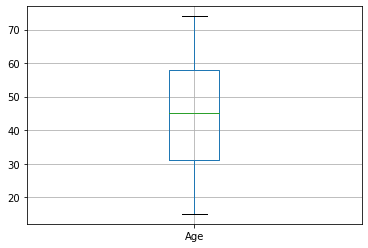

In [55]:
data[['Age']].boxplot()

<AxesSubplot:>

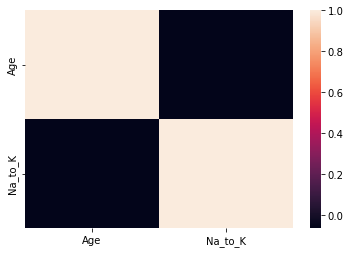

In [56]:
sns.heatmap(data.corr())

In [59]:
data.Sex.value_counts(normalize=True)

M    0.52
F    0.48
Name: Sex, dtype: float64

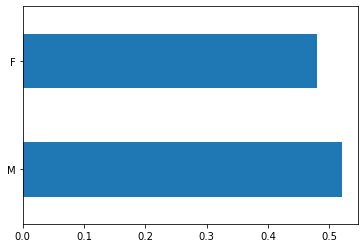

In [60]:
data.Sex.value_counts(normalize=True).plot.barh()
plt.show()

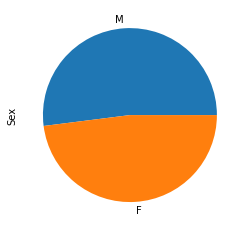

In [61]:
data.Sex.value_counts(normalize=True).plot.pie()
plt.show()